### Import Libraies

In [1]:
# import the different libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data_Exploration(Data Analysis)

In [2]:
Data = pd.read_csv('C:/Users/pooja/OneDrive/Desktop/Sales Forecasting/3. Data_Exploration & Feature_Engineering/Retail Data Exploration(Data_Analysis).csv')

In [3]:
Data = Data.drop(['Unnamed: 0'],axis=1)

In [4]:
Data = Data.sort_values(['Sales_Date'])
Data

,Store_id,Sales_Date,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Store_Dept,Weekly_Sales,Store_Type,Store_Size,Sales_Month,Sales_Year,Fuel_Price
0,1,2010-02-05,42.31,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50,A,151315,2,2010,2.572
1965,17,2010-02-05,23.11,0.00,0.00,0.0,0.00,0.00,126.442065,6.548,False,74,10218.96,B,93188,2,2010,2.666
1966,17,2010-02-05,23.11,0.00,0.00,0.0,0.00,0.00,126.442065,6.548,False,78,1.00,B,93188,2,2010,2.666
1967,17,2010-02-05,23.11,0.00,0.00,0.0,0.00,0.00,126.442065,6.548,False,79,31042.73,B,93188,2,2010,2.666
1968,17,2010-02-05,23.11,0.00,0.00,0.0,0.00,0.00,126.442065,6.548,False,80,842.00,B,93188,2,2010,2.666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419599,5,2012-10-26,71.70,1547.61,1.74,0.0,133.31,598.74,224.037814,5.422,False,36,370.04,B,34875,10,2012,3.506
419600,5,2012-10-26,71.70,1547.61,1.74,0.0,133.31,598.74,224.037814,5.422,False,38,56913.22,B,34875,10,2012,3.506
419601,5,2012-10-26,71.70,1547.61,1.74,0.0,133.31,598.74,224.037814,5.422,False,40,19823.71,B,34875,10,2012,3.506
419592,5,2012-10-26,71.70,1547.61,1.74,0.0,133.31,598.74,224.037814,5.422,False,29,1029.90,B,34875,10,2012,3.506


#### Do some data exploration and data analysis using matplotlib and seaboarn

##### 1. Let's see how many different Store_Type are available

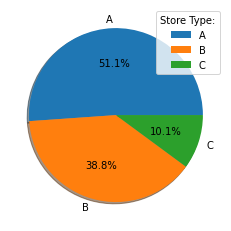

In [5]:
X=Data.Store_Type.value_counts()
Store_Type_Labels = ["A","B","C"]

fig1, ax1 = plt.subplots()
ax1.pie(X,labels=Store_Type_Labels,autopct='%1.1f%%', shadow=True)
ax1.legend(title="Store Type:")

plt.show()

##### 2. what is the product(fuel)price per year

In [6]:
# loading dataset
data1 = Data.groupby(['Sales_Year','Sales_Month','Store_Dept'],as_index = False).Fuel_Price.mean()
data1 = pd.DataFrame(data1)
#data1

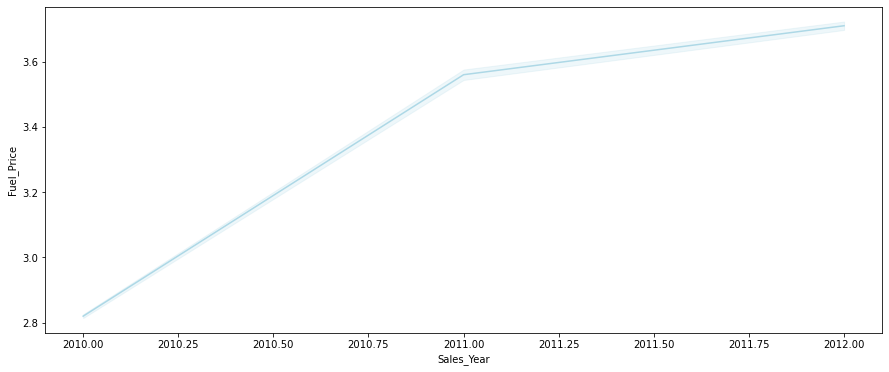

In [7]:
# draw lineplot
# hue by sex
# style to hue
plt.figure(figsize=(15,6))
sns.lineplot(x="Sales_Year", y="Fuel_Price",data=data1,color="lightblue")
  
plt.show()

###### Findings:  Seems like price increase by each year

##### 3. what is the product(fuel)price per month and year

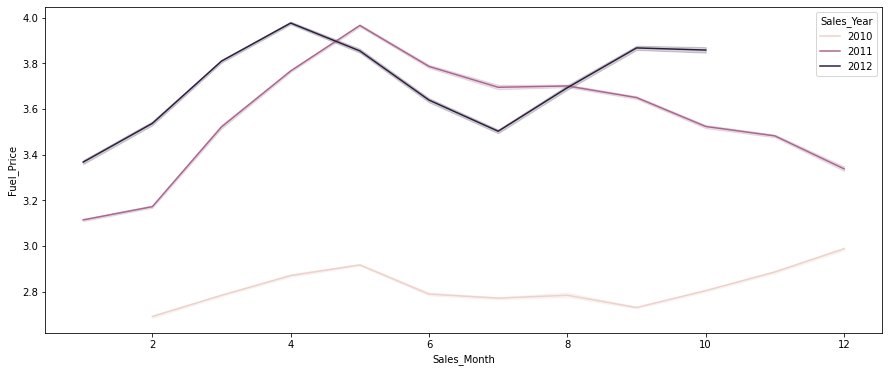

In [8]:
# draw lineplot
# hue by sex
# style to hue
plt.figure(figsize=(15,6))
sns.lineplot(x="Sales_Month", y="Fuel_Price",hue="Sales_Year",data=data1)
plt.show()

###### Findings:  Average Price increase by each year between month April to June

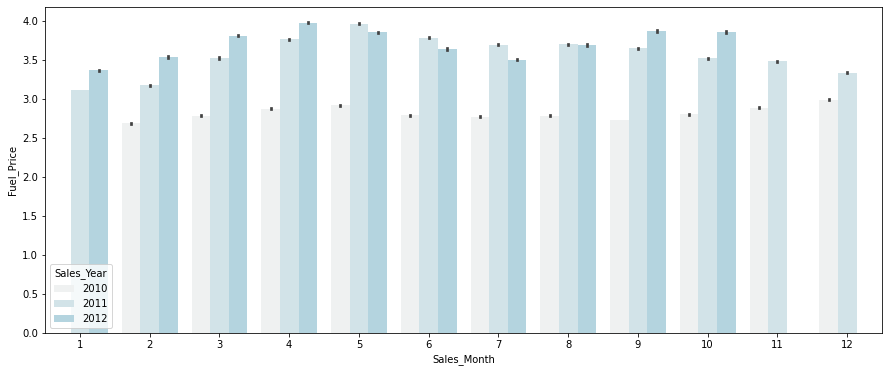

In [9]:
plt.figure(figsize=(15,6))
sns.barplot(x="Sales_Month", y="Fuel_Price",hue="Sales_Year",data=data1,color="lightblue")
#sns.color_palette("Set1")
plt.show()

###### Findings:  Overall highest increased month for fuel price is may

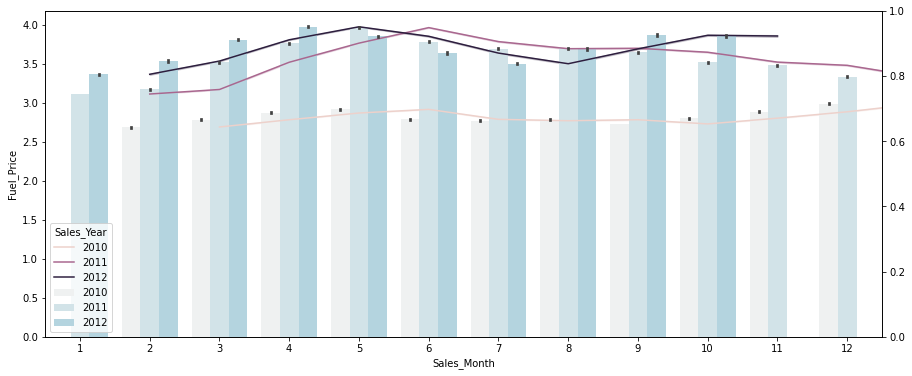

In [10]:
# draw lineplot
# hue by sex
# style to hueValueError: Could not interpret input 'Sales_Month'

plt.figure(figsize=(15,6))
ax1 = sns.lineplot(x="Sales_Month", y='Fuel_Price',hue="Sales_Year",data=data1) 
ax2 = sns.barplot(x="Sales_Month", y='Fuel_Price',hue="Sales_Year",data=data1,color="lightblue")
ax2 = ax1.twinx()
plt.show()

##### 4. Is any affect of holidys on fuel price(increase/decrease based on holiday???)

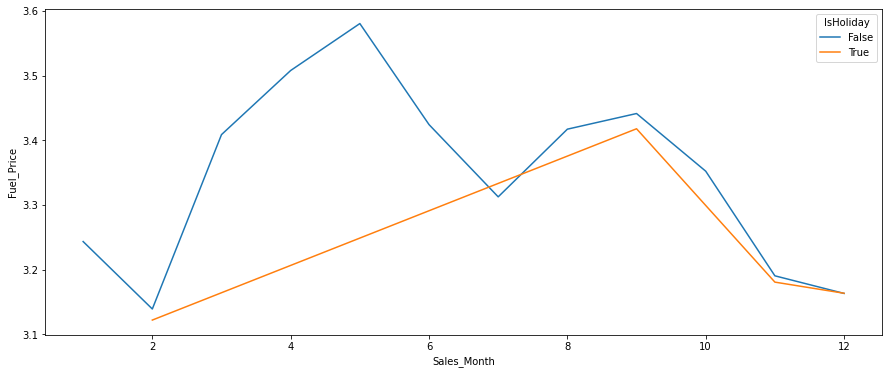

In [11]:
data2 = Data.groupby(['IsHoliday','Sales_Month'],as_index = False).Fuel_Price.mean()
data2 = pd.DataFrame(data2)
data2

plt.figure(figsize=(15,6))
sns.lineplot(x="Sales_Month", y="Fuel_Price",hue="IsHoliday",data=data2)

plt.show()

##### Findings: there is no affect of holidays in fuel price. (weekend price is less or silmilar as other day)

#### 5. Check store wise average fuel price on holidays and normal days difference.

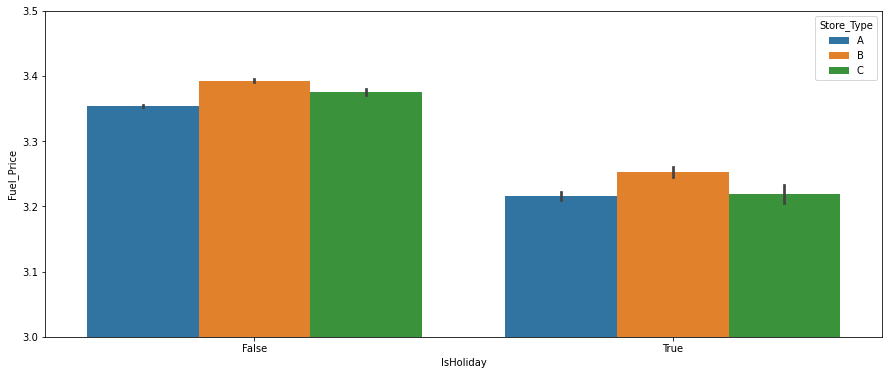

In [12]:
plt.figure(figsize=(15,6))
sns.barplot(x="IsHoliday", y="Fuel_Price",hue="Store_Type",data=Data)
plt.ylim(3,3.5)
plt.show()

##### Findings: All stores has low fuel price on holidays 

#### 6. lets see the overall picture of how fuel price on each month by year

In [13]:
# draw lineplot
# hue by sex
# style to hue
Data['Year-Month'] = Data.Sales_Date.apply(lambda x: str(x)[:7])
data3 = Data.groupby(['Sales_Date','Year-Month'],as_index = False).Fuel_Price.mean()
data3 = pd.DataFrame(data3)
#data3

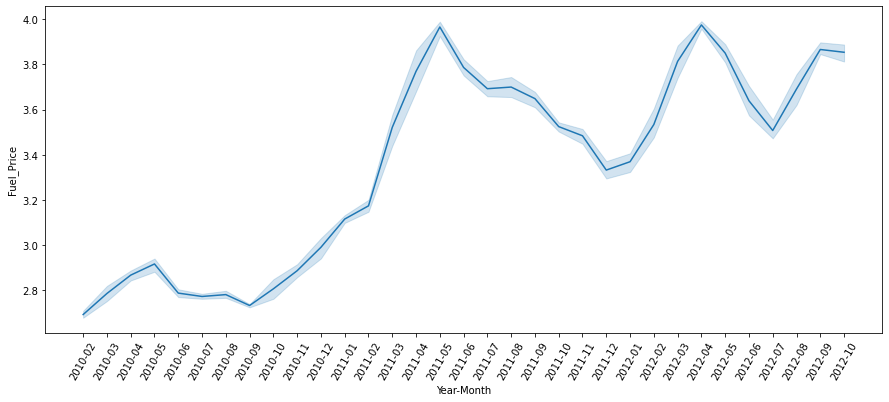

In [14]:
plt.figure(figsize=(15,6))
sns.lineplot(data=data3, x='Year-Month', y="Fuel_Price")
plt.xticks(rotation = 60)
plt.show()

#### 7. Is temprature affects on fuel price???

In [15]:
r=5
Data['Temperature_r'] = Data.sort_values(by=['Temperature']).Temperature.apply(lambda x : x - x %r)
Data

,Store_id,Sales_Date,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Store_Dept,Weekly_Sales,Store_Type,Store_Size,Sales_Month,Sales_Year,Fuel_Price,Year-Month,Temperature_r
0,1,2010-02-05,42.31,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50,A,151315,2,2010,2.572,2010-02,40.0
1965,17,2010-02-05,23.11,0.00,0.00,0.0,0.00,0.00,126.442065,6.548,False,74,10218.96,B,93188,2,2010,2.666,2010-02,20.0
1966,17,2010-02-05,23.11,0.00,0.00,0.0,0.00,0.00,126.442065,6.548,False,78,1.00,B,93188,2,2010,2.666,2010-02,20.0
1967,17,2010-02-05,23.11,0.00,0.00,0.0,0.00,0.00,126.442065,6.548,False,79,31042.73,B,93188,2,2010,2.666,2010-02,20.0
1968,17,2010-02-05,23.11,0.00,0.00,0.0,0.00,0.00,126.442065,6.548,False,80,842.00,B,93188,2,2010,2.666,2010-02,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419599,5,2012-10-26,71.70,1547.61,1.74,0.0,133.31,598.74,224.037814,5.422,False,36,370.04,B,34875,10,2012,3.506,2012-10,70.0
419600,5,2012-10-26,71.70,1547.61,1.74,0.0,133.31,598.74,224.037814,5.422,False,38,56913.22,B,34875,10,2012,3.506,2012-10,70.0
419601,5,2012-10-26,71.70,1547.61,1.74,0.0,133.31,598.74,224.037814,5.422,False,40,19823.71,B,34875,10,2012,3.506,2012-10,70.0
419592,5,2012-10-26,71.70,1547.61,1.74,0.0,133.31,598.74,224.037814,5.422,False,29,1029.90,B,34875,10,2012,3.506,2012-10,70.0


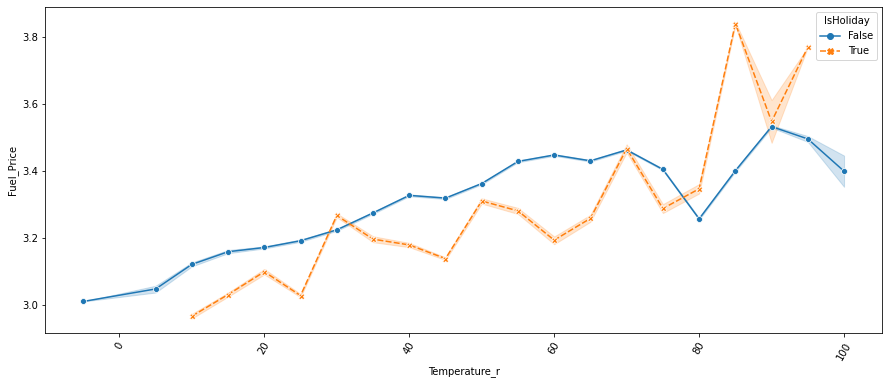

In [16]:
plt.figure(figsize=(15,6))
sns.lineplot(data=Data, x='Temperature_r', y="Fuel_Price",hue="IsHoliday",style = 'IsHoliday', markers = True, ci = 68)
plt.xticks(rotation = 60)
plt.show()

##### Findings : Fuel price increases with increase in temperature steadily during weekdays and unevenly during holidays

#### 7. let's see other parameter's behaviour rescpect to the date/year.

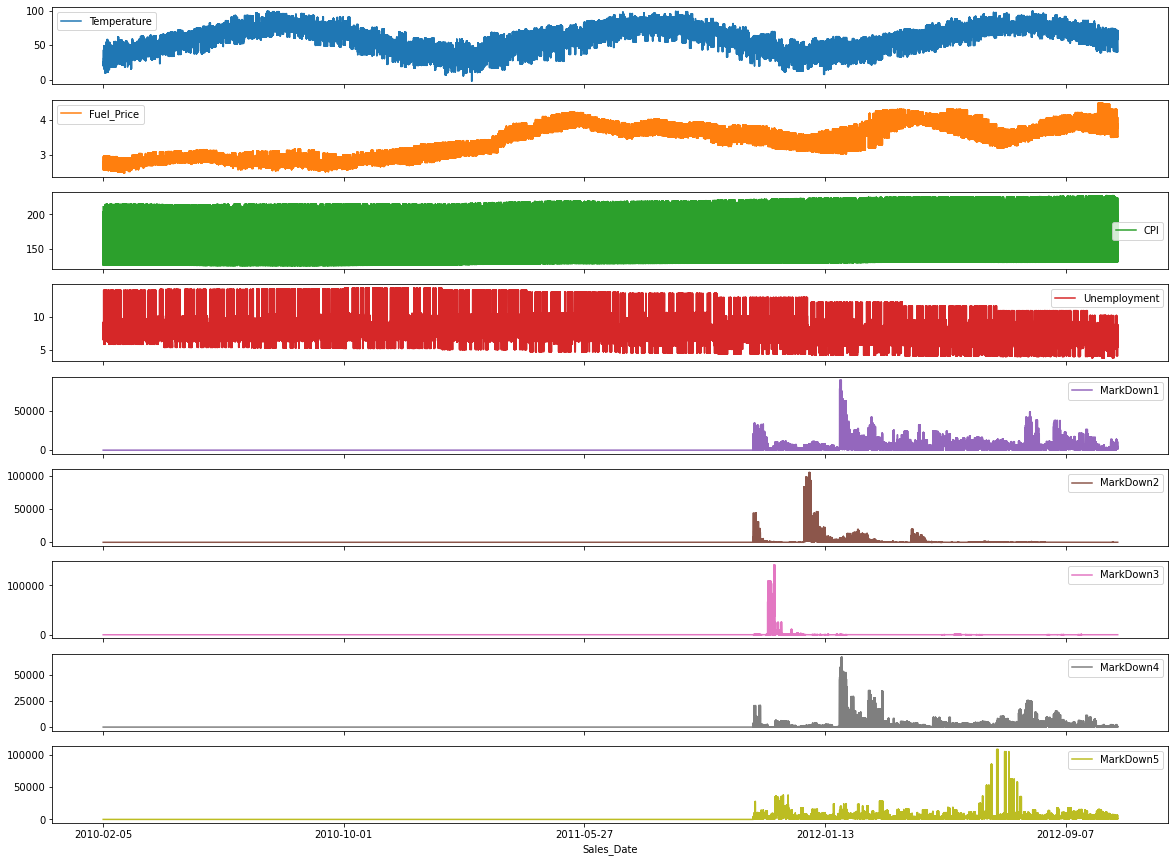

In [17]:
Date = Data[['Sales_Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x = 'Sales_Date', subplots = True, figsize = (20,15))

#### 8. howmany total sales done by each month/year ?

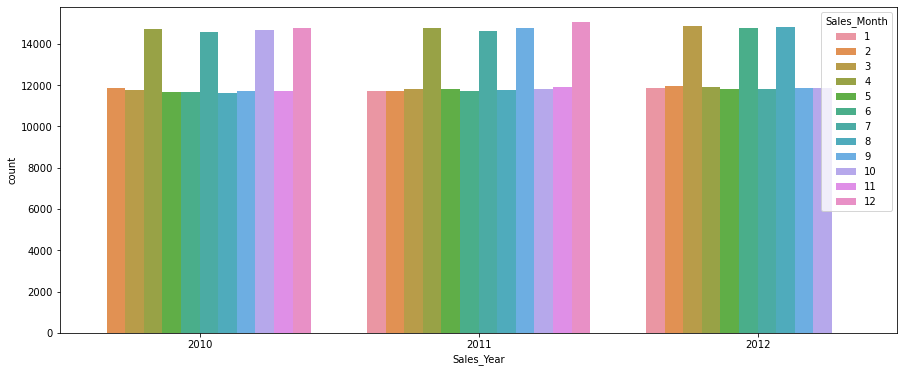

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(x="Sales_Year", hue="Sales_Month",data=Data)
#plt.ylim(3,3.5)
plt.show()

##### Findings: looks like we have very high sales on each year in march,june,september,november 

##### Just see above data it looks in graph

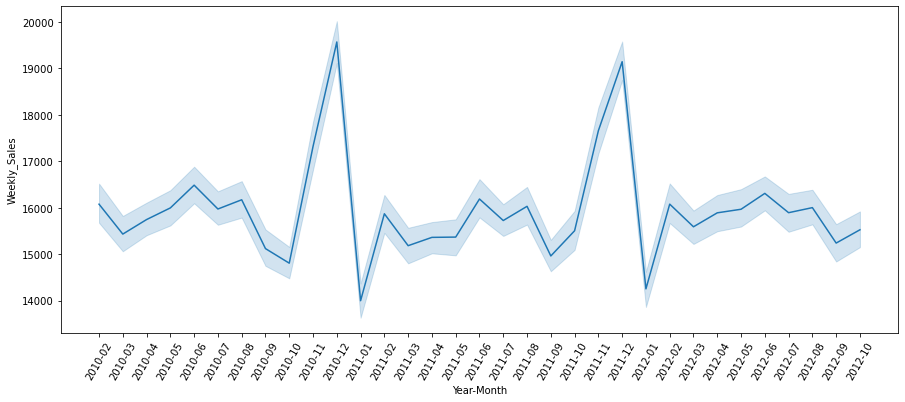

In [19]:
plt.figure(figsize=(15,6))
sns.lineplot(data=Data, x='Year-Month', y="Weekly_Sales")
plt.xticks(rotation = 60)
plt.show()

##### Based on above graph, we can see we have a seasonal data.

#### 9. who is the top performing store from thease data?

In [20]:
Data_top_store = Data.groupby(by=["Store_id"], as_index=False)['Weekly_Sales'].sum()
Data_top_store.sort_values('Weekly_Sales', ascending=False)[:3]

,Store_id,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08


##### Findings: top performing store is Store_number_20

In [22]:
Data.to_csv('C:/Users/pooja/OneDrive/Desktop/Sales Forecasting/3. Data_Exploration & Feature_Engineering/Retail Analysis_Data Preprocessing.csv')